In [1]:
using BenchmarkTools
using GeodesicIntegration

INFO: Recompiling stale cache file /Users/patrick/.julia/lib/v0.6/GeodesicIntegration.ji for module GeodesicIntegration.


In [10]:
# Init
M = 3.0
a = 1.0
q = 1.0

metric = KerrNewmanMetric(M, a, q);

Actual computation

In [11]:
problem = DirectGeodesicProblem(metric)
init_x  = [0.0, 6.0M, π/2, π/4]; # Initial x^μ for all test particles

init_u3_1 = [-1.0, 0.003, 0.08];
init_u3_2 = [-1.0, 0.003, 0.075];
init_u3_3 = [-1.0, 0.003, 0.09];
init_u3_4 = [-1.0, 0.003, 0.085];
init_u3_γ = [-1.0, 0.003, 0.0693];

tspan  = (0.0, 60.0)
diffeq1 = scaffold(problem, init_x, init_u3_1, tspan)
diffeq2 = scaffold(problem, init_x, init_u3_2, tspan)
diffeq3 = scaffold(problem, init_x, init_u3_3, tspan)
diffeq4 = scaffold(problem, init_x, init_u3_4, tspan)
diffeqγ = scaffold(problem, init_x, init_u3_γ, tspan, timelike=false)

sol1 = solve(diffeq1, reltol=1e-6);
sol2 = solve(diffeq2, reltol=1e-6);
sol3 = solve(diffeq3, reltol=1e-6);
sol4 = solve(diffeq4, reltol=1e-6);
solγ = solve(diffeqγ, reltol=1e-8);

Helper function that converts DifferentialEquations.jl output to a matrix

In [12]:
function toarr(sol, dim)
    l   = length(sol)
    res = zeros(l * dim)
    
    for i in 1:l
        for j in 1:dim
            # Column major storage
            res[(j - 1)*l + i] = sol[i][j]
        end
    end
    
    return reshape(res, (l, dim))
end

toarr (generic function with 1 method)

In [13]:
matsol1 = sphericaltocartesian(toarr(sol1, 8))
matsol2 = sphericaltocartesian(toarr(sol2, 8))
matsol3 = sphericaltocartesian(toarr(sol3, 8))
matsol4 = sphericaltocartesian(toarr(sol4, 8))
matsolγ = sphericaltocartesian(toarr(solγ, 8))

28×8 Array{Float64,2}:
   0.0        12.7279     12.7279     1.10218e-15  …  -0.000207733  -0.999996
   0.158383   12.61       12.7408    -0.00400316      -0.000210496  -0.996611
   1.42164    11.6712     12.8371    -0.0356645       -0.000233184  -0.968707
   4.04499     9.72947    12.9947    -0.09977         -0.000282658  -0.905575
   7.21641     7.39439    13.0904    -0.173839        -0.000340255  -0.820074
  10.6719      4.86639    13.0412    -0.249298     …  -0.000384867  -0.716452
  14.4765      2.11422    12.7474    -0.32435         -0.000387926  -0.592156
  18.5573     -0.765387   12.0836    -0.392862        -0.000319051  -0.450906
  22.986      -3.72681    10.8845    -0.449521        -0.000179303  -0.293162
  27.8532     -6.64639     8.95281   -0.486232        -3.58026e-5   -0.118576
  32.5927     -8.99802     6.4904    -0.493264     …  -5.93436e-6    0.051259
  37.2429    -10.7179      3.624     -0.472045        -0.000104567   0.218018
  41.851     -11.8024      0.486461  -0.4

In [14]:
using Plots; pyplot();

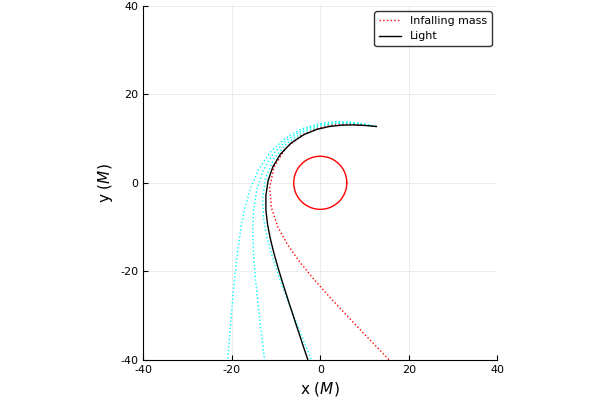

In [15]:
plt = plot(matsol1[:, 2], matsol1[:, 3], aspect_ratio=1, ls=:dot, lc=:cyan, label="")
plot!(matsol2[:, 2], matsol2[:, 3], ls=:dot, lc=:red, label="Infalling mass")
plot!(matsol3[:, 2], matsol3[:, 3], ls=:dot, lc=:cyan, label="")
plot!(matsol4[:, 2], matsol4[:, 3], ls=:dot, lc=:cyan, label="")
plot!(matsolγ[:, 2], matsolγ[:, 3], lc=:black, label="Light")

r = 2.0*M
ϕ = linspace(0, 2π, 100)
plot!(r*cos.(ϕ), r*sin.(ϕ), color=:red, label="", xlims=(-40, 40), ylims=(-40, 40))
xlabel!("x (\$M\$)")
ylabel!("y (\$M\$)")
# png("infall"); plt